# Lyrics Generator
Is an NLP model that is used to create the lyrics of the words given as input using LSTM in it on Tensorflow.


# 1.Aim
The aim is to create a lyrics inducer for any word given as th input and output as the set of words which which will be the lyrics of the song.



# 2.Setup

In [3]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# 3. Importing the dataset

In [4]:
lyric=open('/content/sample_data/lorde.txt').read()
lyric[:2000]

"Well, summer slipped us underneath her tongue\nOur days and nights are perfumed with obsession\nHalf of my wardrobe is on your bedroom floor\nUse our eyes, throw our hands overboard I am your sweetheart psychopathic crush\nDrink up your movements, still I can't get enough\nI overthink your p-punctuation use\nNot my fault, just a thing that my mind do A rush at the beginning\nI get caught up, just for a minute\nBut lover, you're the one to blame, all that you're doing\nCan you hear the violence?\nMegaphone to my chest Broadcast the boom boom boom boom\nAnd make 'em all dance to it\nBroadcast the boom boom boom boom\nAnd make 'em all dance to it\nBroadcast the boom boom boom boom\nAnd make 'em all dance to it\nBroadcast the boom boom boom boom\nAnd make 'em all dance to it\nBroadcast the boom boom boom boom\nAnd make 'em all dance to it Our thing progresses, I call and you come through\nBlow all my friendships to sit in hell with you\nBut we're the greatest, they'll hang us in the Louvr

# 4.Pre processing

In [5]:
corpus=lyric.lower().split('\n')
for i in range(40,60):
    print(corpus[i])

watch the wasters blow the speakers
spill my guts beneath the outdoor light
it's just another graceless night
i hate the headlines and the weather
i'm nineteen and i'm on fire
but when we're dancing i'm alright
it's just another graceless night are you lost enough?
have another drink, get lost in us
this is how we get notorious, oh
'cause i don't know
if they keep tellin' me where to go
i'll blow my brains out to the radio, oh all of the things we're taking
'cause we are young and we're ashamed
send us to perfect places
all of our heroes fading
now i can't stand to be alone
let's go to perfect places every night, i live and die
meet somebody, take 'em home
let's kiss and then take off our clothes
it's just another graceless night, 'cause all of the things we're taking


# 5.Code mounting drive

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 6.Tokenizing

In [7]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1
total_words

1372

# 7.Creating Sequences

In [8]:
input_sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)


In [9]:
for i in range(20):
    print(input_sequences[i])

[112, 196]
[112, 196, 703]
[112, 196, 703, 42]
[112, 196, 703, 42, 568]
[112, 196, 703, 42, 568, 180]
[112, 196, 703, 42, 568, 180, 569]
[22, 165]
[22, 165, 4]
[22, 165, 4, 181]
[22, 165, 4, 181, 36]
[22, 165, 4, 181, 36, 704]
[22, 165, 4, 181, 36, 704, 21]
[22, 165, 4, 181, 36, 704, 21, 705]
[706, 13]
[706, 13, 9]
[706, 13, 9, 707]
[706, 13, 9, 707, 40]
[706, 13, 9, 707, 40, 27]
[706, 13, 9, 707, 40, 27, 19]
[706, 13, 9, 707, 40, 27, 19, 439]


# 8.Padding

In [10]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len,
padding='pre'))
print(max_sequence_len)
print(input_sequences)

29
[[  0   0   0 ...   0 112 196]
 [  0   0   0 ... 112 196 703]
 [  0   0   0 ... 196 703  42]
 ...
 [  0   0   0 ... 207 140 140]
 [  0   0   0 ... 140 140 140]
 [  0   0   0 ... 140 140 140]]


# 9.Building the model

In [11]:
model = Sequential()
model.add(Embedding(1372, 160, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(200, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(1372/2, activation='relu', kernel_regularizer=regularizers.l2(0.001
)))
model.add(Dense(1372, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 28, 160)           219520    
_________________________________________________________________
bidirectional (Bidirectional (None, 28, 400)           577600    
_________________________________________________________________
dropout (Dropout)            (None, 28, 400)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               200400    
_________________________________________________________________
dense (Dense)                (None, 686)               69286     
_________________________________________________________________
dense_1 (Dense)              (None, 1372)              942564    
Total params: 2,009,370
Trainable params: 2,009,370
Non-trainable params: 0
______________________________________________

In [12]:
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]
label = ku.to_categorical(label, num_classes=total_words)

# 10. Training the model

In [13]:
history = model.fit(predictors, label, epochs=50, verbose=1)

Epoch 1/50
380/380 [==============================] - 102s 253ms/step - loss: 5.9903 - accuracy: 0.0510
Epoch 2/50
380/380 [==============================] - 95s 249ms/step - loss: 5.4439 - accuracy: 0.0571
Epoch 3/50
380/380 [==============================] - 89s 235ms/step - loss: 5.1040 - accuracy: 0.0702
Epoch 4/50
380/380 [==============================] - 91s 239ms/step - loss: 4.7814 - accuracy: 0.0965
Epoch 5/50
380/380 [==============================] - 92s 243ms/step - loss: 4.5172 - accuracy: 0.1312
Epoch 6/50
380/380 [==============================] - 91s 240ms/step - loss: 4.2415 - accuracy: 0.1735
Epoch 7/50
380/380 [==============================] - 91s 239ms/step - loss: 3.9767 - accuracy: 0.2148
Epoch 8/50
380/380 [==============================] - 90s 237ms/step - loss: 3.7303 - accuracy: 0.2477
Epoch 9/50
380/380 [==============================] - 90s 237ms/step - loss: 3.5111 - accuracy: 0.2747
Epoch 10/50
380/380 [==============================] - 90s 238ms/step - 

# 11.Analysing the results

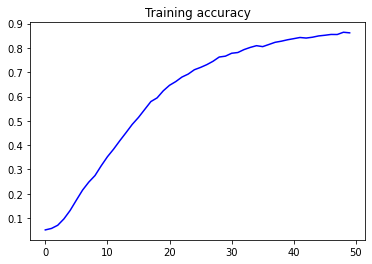

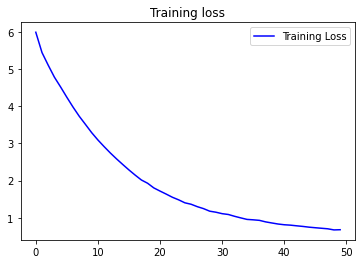

In [14]:
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.figure()
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()
plt.show()

# 12.Saving the model

In [15]:
model.save('lyrics_generator.h5')

# 13.Loading the model

In [16]:
from keras.models import load_model
loaded_model=load_model('lyrics_generator.h5')

In [17]:
next_words=50
seed_text='diamond in the flash'

In [18]:
def lyrics(next_words,seed_text):
  for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-
  1, padding='pre')
    predicted = np.argmax(loaded_model.predict(token_list, verbose=0), axis=-1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
      if index == predicted:
        output_word = word
        break
    seed_text += " " + output_word
  print(seed_text)

In [19]:
lyrics(next_words,seed_text)

diamond in the flash red orange yellow flicker beat sparking up my heart i dream all year but they're not the same kinds of buzz do my mind do it let us of it you only back eyes back that where you back you only loved you that it's back you got take i'm


# Saving the model in json

In [20]:
import time
saved_model_path = "./{}.h5".format(int(time.time()))
model.save(saved_model_path)

In [21]:
!pip install tensorflowjs

     |████████████████████████████████| 64 kB 1.9 MB/s 


In [22]:
import tensorflowjs

In [23]:
!tensorflowjs_converter --input_format=keras {saved_model_path} ./

2021-08-06 14:21:00.519061: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [24]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


# Loading the model from json

In [25]:
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [26]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 28, 160)           219520    
_________________________________________________________________
bidirectional (Bidirectional (None, 28, 400)           577600    
_________________________________________________________________
dropout (Dropout)            (None, 28, 400)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               200400    
_________________________________________________________________
dense (Dense)                (None, 686)               69286     
_________________________________________________________________
dense_1 (Dense)              (None, 1372)              942564    
Total params: 2,009,370
Trainable params: 2,009,370
Non-trainable params: 0
______________________________________________

In [27]:
next_words = 100
seed_text = "diamond in the flash"

In [28]:
def lyrics(next_words,seed_text):
  for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-
  1, padding='pre')
    predicted = np.argmax(loaded_model.predict(token_list, verbose=0), axis=-1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
      if index == predicted:
        output_word = word
        break
    seed_text += " " + output_word
  print(seed_text)

In [29]:
lyrics(next_words,seed_text)

diamond in the flash red orange yellow flicker beat sparking up my heart i dream all year but they're not the same kinds of buzz do my mind do it let us of it you only back eyes back that where you back you only loved you that it's back you got take i'm people are be royals royals to work time time size i call that we were back i back these right dream with me and down big light i back my mother's child i'll our lovers i call you only loved you only much down to me back that i will


In [30]:
next_words=50

In [31]:
seed_text

'diamond in the flash'

In [32]:
seed_text="hey you are a"

In [33]:
lyrics(next_words,seed_text)

hey you are a little much for me it's boring how people talk to me good b i never go those holes as leave it so nonchalant gonna had eyes come you know up with me and the swingin' other how there's a evening pulled it the same kinds of rubies cares we let


 Model Testing



# Model Testing


In [34]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [35]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1
total_words

1372

In [36]:
input_sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

In [37]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len,
padding='pre'))
print(max_sequence_len)
print(input_sequences)

29
[[  0   0   0 ...   0 112 196]
 [  0   0   0 ... 112 196 703]
 [  0   0   0 ... 196 703  42]
 ...
 [  0   0   0 ... 207 140 140]
 [  0   0   0 ... 140 140 140]
 [  0   0   0 ... 140 140 140]]


In [38]:
from keras.models import load_model
loaded_model = load_model('lyrics_generator.h5')

In [39]:
next_words = 50
seed_text = "i am a king"

In [40]:
def lyrics(next_words,seed_text):
  for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-
  1, padding='pre')
    predicted = np.argmax(loaded_model.predict(token_list, verbose=0), axis=-1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
      if index == predicted:
        output_word = word
        break
    seed_text += " " + output_word
  print(seed_text)

In [41]:
lyrics(next_words,seed_text)

i am a king of heads a toy that people enjoy my mind do a rush at the beginning that we offered when i reach for you all that you're down that i thought back i'm little way it only hits eyes only good at wish it up eyes perfect like i'm back eyes


In [42]:
!pip install jupyter-dash

     |████████████████████████████████| 1.1 MB 6.3 MB/s 
     |████████████████████████████████| 3.7 MB 30.6 MB/s 
     |████████████████████████████████| 83 kB 2.0 MB/s 
     |████████████████████████████████| 1.8 MB 65.0 MB/s 
     |████████████████████████████████| 357 kB 40.1 MB/s 
  Created wheel for dash: filename=dash-1.21.0-py3-none-any.whl size=1100489 sha256=be199c970c63ac0064c3206871060d486229d61f8f8c9a859173b092ca974958
  Stored in directory: /root/.cache/pip/wheels/59/a4/f1/a7140afcad8dbaa3b1b12ef80843d29403d6ecca1c2f397948
  Created wheel for dash-core-components: filename=dash_core_components-1.17.1-py3-none-any.whl size=3738995 sha256=ddcac7e5f4a35fdd83f00518a139093b64396183ff0f61a9cba94f0e87b9b616
  Stored in directory: /root/.cache/pip/wheels/ca/5b/fb/a135a7bf8e21223e4104aa5526a5173a20b64fe7fcd055b999
  Created wheel for dash-html-components: filename=dash_html_components-1.1.4-py3-none-any.whl size=319771 sha256=51c20d5630f2578cdf69448b7816bfa6797059db51621086bfa4a1f

In [43]:
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output


In [44]:
df = px.data.tips()# Build App
app = JupyterDash(__name__)

app.layout = html.Div([
    html.H1('Lyrics Generator'),
    html.Div(["Next_words: ",
              dcc.Input(id='my-input', type='number')]),
    html.Div(["Seed_text: ",
              dcc.Input(id='my-input1', type='text')]),
    html.Button('Generate Lyrics', id='show-lyrics'),
    html.Div(id='body-div')
])

@app.callback(
    Output(component_id='body-div', component_property='children'),
    Input(component_id='show-lyrics', component_property='n_clicks'),
    Input(component_id='my-input', component_property='value'),
    Input(component_id='my-input1', component_property='value'),    
)
def update_output(n_clicks,input_value,input_value1):
    if n_clicks is None:
        raise PreventUpdate
    else:
        return lyrics(input_value,input_value1)
def lyrics(next_words,seed_text):
  for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-
  1, padding='pre')
    predicted = np.argmax(loaded_model.predict(token_list, verbose=0), axis=-1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
      if index == predicted:
        output_word = word
        break
    seed_text += " " + output_word
  return seed_text

In [47]:
app.run_server(mode='external', port=8060)

Dash app running on:


<IPython.core.display.Javascript object>

In [46]:
app._terminate_server_for_port("localhost", 8060)